# Overview:
The Quranic Analysis Project aims to explore and analyze the text of the Quran, the holy scripture of Islam, using various data analysis and natural language processing techniques. The project involves extracting insights, patterns, and themes from the Quranic text to deepen our understanding of its content, structure, and linguistic characteristics.

![](https://media.istockphoto.com/id/1147281423/photo/quran-holy-book-of-muslims.jpg?s=612x612&w=0&k=20&c=BNGYCYc5rJoG9v-IMEKOaU1pm5iAxu8_Wa-64HUOBd8=)

# Dataset:
The project utilizes a dataset containing the text of the Quran which is avaliable in kaggle, along with metadata such as surah names, ayat numbers, translations, and other relevant information. The dataset allows for systematic exploration and analysis of the Quranic text across different dimensions.

# Analysis Techniques:

The project employs a variety of data analysis and natural language processing techniques to uncover insights from the Quranic text. These techniques include:

- Exploratory Data Analysis (EDA): Examining the distribution and characteristics of Quranic verses, surahs, and other textual elements to identify patterns and trends.

- Sentiment Analysis: Analyzing the sentiment or tone of Quranic verses to understand the emotional context of the text.

- Topic Modeling: Identifying latent topics or themes present in the Quranic text using techniques such as Latent Dirichlet Allocation (LDA).

- Stylometric Analysis: Investigating the writing style and linguistic characteristics of Quranic verses to explore questions of authorship or consistency.

- Geospatial Analysis: Visualizing the distribution of revelation places mentioned in the Quran on a map to explore geographic patterns.

- Language Complexity Analysis: Assessing the complexity of language used in the Quranic text, including average word length, vocabulary richness, and sentence structure complexity.

# Importing Library and Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt

In [2]:
quran = pd.read_csv('/kaggle/input/the-quran-dataset/The Quran Dataset.csv')

In [3]:
quran.head(10)

,surah_no,surah_name_en,surah_name_ar,surah_name_roman,ayah_no_surah,ayah_no_quran,ayah_ar,ayah_en,ruko_no,juz_no,manzil_no,hizb_quarter,total_ayah_surah,total_ayah_quran,place_of_revelation,sajah_ayah,sajdah_no,no_of_word_ayah,list_of_words
0,1,The Opener,الفاتحة,Al-Fatihah,1,1,بِسْمِ ٱللَّهِ ٱلرَّحْمَٰنِ ٱلرَّحِيمِ,"In the Name of Allah—the Most Compassionate, M...",1,1,1,1,7,6236,Meccan,False,NaN,4,"[بِسْمِ,ٱللَّهِ,ٱلرَّحْمَٰنِ,ٱلرَّحِيمِ]"
1,1,The Opener,الفاتحة,Al-Fatihah,2,2,ٱلْحَمْدُ لِلَّهِ رَبِّ ٱلْعَٰلَمِينَ,"All praise is for Allah—Lord of all worlds,",1,1,1,1,7,6236,Meccan,False,NaN,4,"[ٱلْحَمْدُ,لِلَّهِ,رَبِّ,ٱلْعَٰلَمِينَ]"
2,1,The Opener,الفاتحة,Al-Fatihah,3,3,ٱلرَّحْمَٰنِ ٱلرَّحِيمِ,"the Most Compassionate, Most Merciful,",1,1,1,1,7,6236,Meccan,False,NaN,2,"[ٱلرَّحْمَٰنِ,ٱلرَّحِيمِ]"
3,1,The Opener,الفاتحة,Al-Fatihah,4,4,مَٰلِكِ يَوْمِ ٱلدِّينِ,Master of the Day of Judgment.,1,1,1,1,7,6236,Meccan,False,NaN,3,"[مَٰلِكِ,يَوْمِ,ٱلدِّينِ]"
4,1,The Opener,الفاتحة,Al-Fatihah,5,5,إِيَّاكَ نَعْبُدُ وَإِيَّاكَ نَسْتَعِينُ,You ˹alone˺ we worship and You ˹alone˺ we ask ...,1,1,1,1,7,6236,Meccan,False,NaN,4,"[إِيَّاكَ,نَعْبُدُ,وَإِيَّاكَ,نَسْتَعِينُ]"
5,1,The Opener,الفاتحة,Al-Fatihah,6,6,ٱهْدِنَا ٱلصِّرَٰطَ ٱلْمُسْتَقِيمَ,"Guide us along the Straight Path,",1,1,1,1,7,6236,Meccan,False,NaN,3,"[ٱهْدِنَا,ٱلصِّرَٰطَ,ٱلْمُسْتَقِيمَ]"
6,1,The Opener,الفاتحة,Al-Fatihah,7,7,صِرَٰطَ ٱلَّذِينَ أَنْعَمْتَ عَلَيْهِمْ غَيْرِ...,the Path of those You have blessed—not those Y...,1,1,1,1,7,6236,Meccan,False,NaN,9,"[صِرَٰطَ,ٱلَّذِينَ,أَنْعَمْتَ,عَلَيْهِمْ,غَيْر..."
7,2,The Cow,البقرة,Al-Baqarah,1,8,الٓمٓ,Alif-Lãm-Mĩm.,2,1,1,1,286,6236,Medinan,False,NaN,1,[الٓمٓ]
8,2,The Cow,البقرة,Al-Baqarah,2,9,ذَٰلِكَ ٱلْكِتَٰبُ لَا رَيْبَ ۛ فِيهِ ۛ هُدًۭى...,This is the Book! There is no doubt about it,2,1,1,1,286,6236,Medinan,False,NaN,9,"[ذَٰلِكَ,ٱلْكِتَٰبُ,لَا,رَيْبَ,ۛ,فِيهِ,ۛ,هُدًۭ..."
9,2,The Cow,البقرة,Al-Baqarah,3,10,ٱلَّذِينَ يُؤْمِنُونَ بِٱلْغَيْبِ وَيُقِيمُونَ...,"who believe in the unseen, establish prayer, a...",2,1,1,1,286,6236,Medinan,False,NaN,8,"[ٱلَّذِينَ,يُؤْمِنُونَ,بِٱلْغَيْبِ,وَيُقِيمُون..."


In [4]:
quran.describe()

,surah_no,ayah_no_surah,ayah_no_quran,ruko_no,juz_no,manzil_no,hizb_quarter,total_ayah_surah,total_ayah_quran,sajdah_no,no_of_word_ayah
count,6236.000000,6236.000000,6236.000000,6236.000000,6236.000000,6236.000000,6236.000000,6236.000000,6236.0,15.000000,6236.000000
mean,33.519724,53.506575,3118.500000,313.199487,18.478833,4.528544,144.282232,106.013149,6236.0,8.000000,13.152341
std,26.461261,50.463924,1800.322471,155.390464,8.610080,2.057783,68.975408,69.497665,0.0,4.472136,10.319120
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,6236.0,1.000000,1.000000
25%,11.000000,16.000000,1559.750000,190.000000,12.000000,3.000000,93.000000,52.000000,6236.0,4.500000,6.000000
50%,26.000000,38.000000,3118.500000,325.000000,19.000000,5.000000,150.000000,93.000000,6236.0,8.000000,11.000000
75%,51.000000,75.000000,4677.250000,455.000000,26.000000,7.000000,208.000000,135.000000,6236.0,11.500000,17.000000
max,114.000000,286.000000,6236.000000,556.000000,30.000000,7.000000,240.000000,286.000000,6236.0,15.000000,144.000000


In [5]:
quran.columns

Index(['surah_no', 'surah_name_en', 'surah_name_ar', 'surah_name_roman',
       'ayah_no_surah', 'ayah_no_quran', 'ayah_ar', 'ayah_en', 'ruko_no',
       'juz_no', 'manzil_no', 'hizb_quarter', 'total_ayah_surah',
       'total_ayah_quran', 'place_of_revelation', 'sajah_ayah', 'sajdah_no',
       'no_of_word_ayah', 'list_of_words'],
      dtype='object')

In [6]:
quran.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6236 entries, 0 to 6235
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   surah_no             6236 non-null   int64  
 1   surah_name_en        6236 non-null   object 
 2   surah_name_ar        6236 non-null   object 
 3   surah_name_roman     6236 non-null   object 
 4   ayah_no_surah        6236 non-null   int64  
 5   ayah_no_quran        6236 non-null   int64  
 6   ayah_ar              6236 non-null   object 
 7   ayah_en              6236 non-null   object 
 8   ruko_no              6236 non-null   int64  
 9   juz_no               6236 non-null   int64  
 10  manzil_no            6236 non-null   int64  
 11  hizb_quarter         6236 non-null   int64  
 12  total_ayah_surah     6236 non-null   int64  
 13  total_ayah_quran     6236 non-null   int64  
 14  place_of_revelation  6236 non-null   object 
 15  sajah_ayah           6236 non-null   b

# Columns descriptions

1. **surah_no**:
   - This column represents the number of the surah (chapter) in the Quran.
   - Significance: Surahs are the chapters of the Quran, each of which contains verses (ayahs) and covers specific themes, events, or teachings.

2. **surah_name_en**:
   - This column contains the name of the surah in English.
   - Significance: Provides the English name of the surah, which helps in identifying and referencing specific surahs.

3. **surah_name_ar**:
   - This column contains the name of the surah in Arabic.
   - Significance: Provides the Arabic name of the surah, which is important for Islamic scholarship and reference.

4. **surah_name_roman**:
   - This column contains the name of the surah in Roman script.
   - Significance: Provides an alternative representation of the surah name in a widely understandable script.

5. **ayah_no_surah**:
   - This column represents the number of the ayah (verse) within the surah.
   - Significance: Helps in identifying and referencing specific verses within each surah.

6. **ayah_no_quran**:
   - This column represents the overall number of the ayah in the Quran.
   - Significance: Provides a unique identifier for each ayah in the entire Quran.

7. **ayah_ar**:
   - This column contains the text of the ayah in Arabic.
   - Significance: Contains the original Arabic text of each ayah, which is the primary source for Quranic study and recitation.

8. **ayah_en**:
   - This column contains the English translation of the ayah.
   - Significance: Provides the meaning of each ayah in English, facilitating understanding for non-Arabic speakers.

9. **ruko_no**:
   - This column represents the number of the ruko (section) within the surah.
   - Significance: Indicates the sections within each surah where recitation is recommended to pause briefly.

10. **juz_no**:
    - This column represents the number of the juz (section) within the Quran.
    - Significance: The Quran is divided into 30 equal sections (juz) for recitation during the month of Ramadan. This column helps identify the section each ayah belongs to.

11. **manzil_no**:
    - This column represents the manzil (division) within the Quran.
    - Significance: The Quran is divided into seven manazil for recitation in a week. This column helps identify the division each ayah belongs to.

12. **hizb_quarter**:
    - This column represents the hizb (division) within the Quran.
    - Significance: The Quran is divided into 60 hizbs for easier recitation over a month. This column helps identify the division each ayah belongs to.

13. **total_ayah_surah**:
    - This column represents the total number of ayahs in the surah.
    - Significance: Indicates the total number of verses in each surah, providing context for its length and structure.

14. **total_ayah_quran**:
    - This column represents the total number of ayahs in the Quran.
    - Significance: Provides the total count of verses in the entire Quran, useful for understanding its overall size and structure.

15. **place_of_revelation**:
    - This column contains information about the place of revelation of the surah.
    - Significance: Provides context regarding where specific surahs were revealed, aiding in understanding their historical and contextual significance.

16. **sajah_ayah**:
    - This column indicates whether the ayah contains Sajdah (prostration).
    - Significance: Highlights verses in the Quran where prostration is recommended, emphasizing their spiritual significance.

17. **sajdah_no**:
    - This column represents the number of the sajdah (prostration) if applicable.
    - Significance: Provides the number of the sajdah if a verse contains Sajdah, allowing for easy identification and reference.

18. **no_of_word_ayah**:
    - This column represents the number of words in the ayah.
    - Significance: Provides quantitative information about the length of each ayah, which can be useful for linguistic analysis and comparison.

19. **list_of_words**:
    - This column contains a list of words in the ayah.
    - Significance: Provides the words constituting each ayah, facilitating detailed textual analysis and study.


# Checking for Missing Values

It's essential to check for missing values or inconsistencies in the dataset:

In [7]:
# Check for missing values
missing_values = quran.isnull().sum()
print("Missing Values:\n", missing_values)


Missing Values:
 surah_no                  0
surah_name_en             0
surah_name_ar             0
surah_name_roman          0
ayah_no_surah             0
ayah_no_quran             0
ayah_ar                   0
ayah_en                   0
ruko_no                   0
juz_no                    0
manzil_no                 0
hizb_quarter              0
total_ayah_surah          0
total_ayah_quran          0
place_of_revelation       0
sajah_ayah                0
sajdah_no              6221
no_of_word_ayah           0
list_of_words             0
dtype: int64


In [8]:
# Drop the 'sajdah_no' column from the dataset
quran = quran.drop(columns=['sajdah_no'])

# Verify that the column has been dropped
print("Columns after dropping 'sajdah_no':\n", quran.columns)


Columns after dropping 'sajdah_no':
 Index(['surah_no', 'surah_name_en', 'surah_name_ar', 'surah_name_roman',
       'ayah_no_surah', 'ayah_no_quran', 'ayah_ar', 'ayah_en', 'ruko_no',
       'juz_no', 'manzil_no', 'hizb_quarter', 'total_ayah_surah',
       'total_ayah_quran', 'place_of_revelation', 'sajah_ayah',
       'no_of_word_ayah', 'list_of_words'],
      dtype='object')


# Exploring Patterns or Trends
We can explore any patterns or trends in the data that might be of interest for analysis:

In [9]:
# Example: Distribution of verses across surahs
verse_distribution = quran.groupby('surah_no').size()
print("Verse Distribution Across Surahs:\n", verse_distribution)


Verse Distribution Across Surahs:
 surah_no
1        7
2      286
3      200
4      176
5      120
      ... 
110      3
111      5
112      4
113      5
114      6
Length: 114, dtype: int64


# Investigating the Longest and Shortest Surahs:

In [10]:
# Find the longest surah
longest_surah = verse_distribution.idxmax()
longest_surah_name = quran.loc[quran['surah_no'] == longest_surah, 'surah_name_en'].iloc[0]
longest_surah_length = verse_distribution.max()

# Find the shortest surah
shortest_surah = verse_distribution.idxmin()
shortest_surah_name = quran.loc[quran['surah_no'] == shortest_surah, 'surah_name_en'].iloc[0]
shortest_surah_length = verse_distribution.min()

print("Longest Surah:", longest_surah_name)
print("Number of Verses:", longest_surah_length)
print("\nShortest Surah:", shortest_surah_name)
print("Number of Verses:", shortest_surah_length)


Longest Surah: The Cow
Number of Verses: 286

Shortest Surah: The Declining Day
Number of Verses: 3


#  Distribution of Verse Lengths within Each Surah:

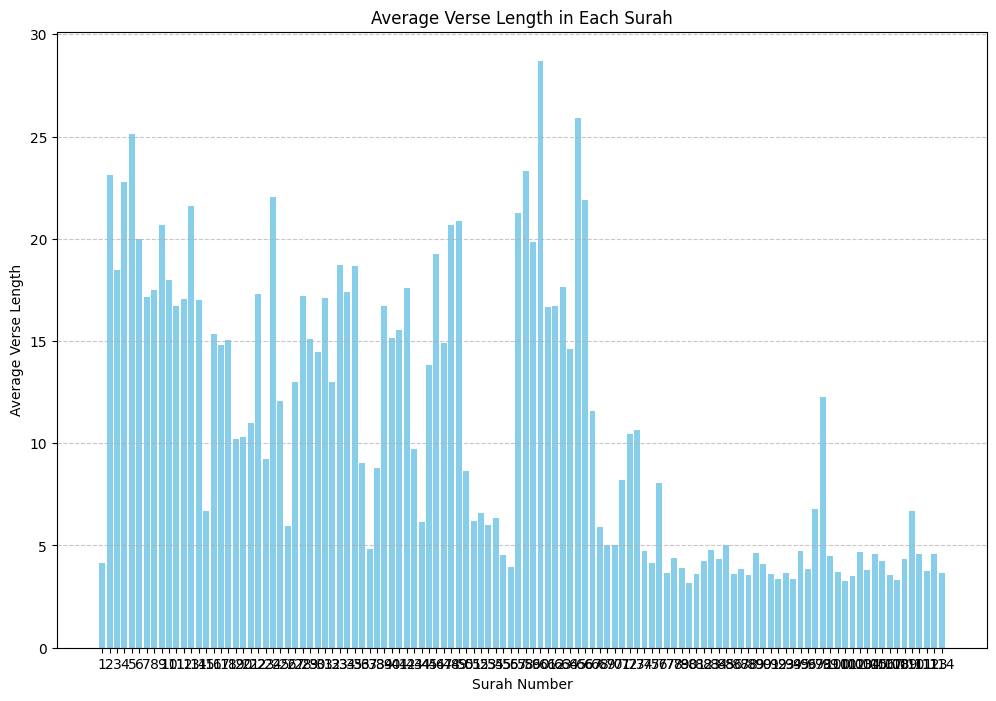

In [11]:
import matplotlib.pyplot as plt

# Calculate the average verse length for each surah
average_verse_length = quran.groupby('surah_no')['no_of_word_ayah'].mean()

# Plotting the distribution of verse lengths within each surah
plt.figure(figsize=(12, 8))
plt.bar(average_verse_length.index, average_verse_length.values, color='skyblue')
plt.title('Average Verse Length in Each Surah')
plt.xlabel('Surah Number')
plt.ylabel('Average Verse Length')
plt.xticks(range(1, 115))  # Assuming there are 114 surahs in the Quran
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


# Thematic Progression throughout the Quran:

Analyzing the thematic progression involves examining the content and themes of different surahs. While a comprehensive thematic analysis would require in-depth study, we can start by looking at broad thematic categories and identifying any noticeable patterns or shifts.

## Word Cloud of Quranic Verses: 
We can create a word cloud to visualize the most frequent words or phrases in the Quranic verses, providing insights into recurring themes or topics.

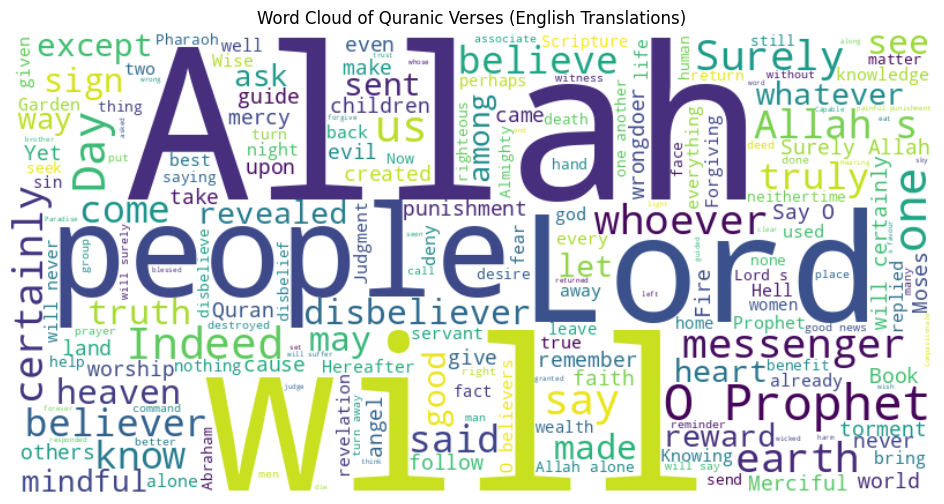

In [12]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Concatenate all English translations of Quranic verses into a single string
english_translations = ' '.join(quran['ayah_en'])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(english_translations)

# Plot the word cloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Quranic Verses (English Translations)')
plt.axis('off')
plt.show()


## Sentiment Analysis: 
We can perform sentiment analysis on the English translations of Quranic verses to understand the overall sentiment or tone of the text.

In [13]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

# Download necessary resources for nltk
nltk.download('vader_lexicon')

# Initialize the sentiment analyzer
sentiment_analyzer = SentimentIntensityAnalyzer()

# Perform sentiment analysis on each English translation of Quranic verses
sentiments = []
for verse in quran['ayah_en']:
    sentiment_score = sentiment_analyzer.polarity_scores(verse)
    # Classify the verse based on compound score
    if sentiment_score['compound'] >= 0.05:
        sentiment = 'Positive'
    elif sentiment_score['compound'] <= -0.05:
        sentiment = 'Negative'
    else:
        sentiment = 'Neutral'
    sentiments.append(sentiment)

# Add the sentiment labels to the dataframe
quran['sentiment'] = sentiments

# Display the counts of each sentiment category
sentiment_counts = quran['sentiment'].value_counts()
print("Sentiment Analysis Results:")
print(sentiment_counts)


/opt/conda/lib/python3.10/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /usr/share/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
Sentiment Analysis Results:
sentiment
Positive    2972
Negative    1972
Neutral     1292
Name: count, dtype: int64


## Network Analysis of Words: 
We can analyze the relationships between words in the Quranic text using network analysis techniques, revealing patterns of word co-occurrence and semantic connections.

In [14]:
import networkx as nx

# Function to tokenize verses into words
def tokenize_verse(verse):
    return verse.split()

# Create a new networkx graph
G = nx.Graph()

# Tokenize each verse and add edges between co-occurring words
for verse in quran['ayah_en']:
    words = tokenize_verse(verse)
    for i, word in enumerate(words):
        for j in range(i + 1, len(words)):
            if G.has_edge(word, words[j]):
                # Increment edge weight if edge already exists
                G[word][words[j]]['weight'] += 1
            else:
                # Add new edge with weight 1
                G.add_edge(word, words[j], weight=1)

# Print some basic statistics about the network
print("Number of nodes (words):", G.number_of_nodes())
print("Number of edges (co-occurrences):", G.number_of_edges())

# Optional: Print the top 10 words with the highest degree centrality
degree_centrality = nx.degree_centrality(G)
top_words = sorted(degree_centrality, key=degree_centrality.get, reverse=True)[:10]
print("\nTop 10 Words by Degree Centrality:")
for word in top_words:
    print(word)


Number of nodes (words): 13027
Number of edges (co-occurrences): 769850

Top 10 Words by Degree Centrality:
the
and
to
of
is
you
a
in
they
will


These words have the highest degree centrality, indicating that they are frequently co-occurring with other words in the Quranic verses.

**One interesting aspect we can explore is identifying communities of words within the network. Community detection algorithms can help identify groups of words that are densely connected within themselves but sparsely connected with the rest of the network.**

We'll use the Louvain community detection algorithm, which is a popular method for detecting communities in networks. Here's how we can do it:

In [15]:
import community

# Apply the Louvain community detection algorithm
communities = community.best_partition(G)

# Print the number of detected communities
num_communities = len(set(communities.values()))
print("Number of detected communities:", num_communities)

# Print the top words in each community
print("\nTop words in each community:")
for community_id in range(num_communities):
    words_in_community = [word for word, community_label in communities.items() if community_label == community_id]
    print(f"Community {community_id}: {', '.join(words_in_community[:5])}")


Number of detected communities: 7

Top words in each community:
Community 0: by, up, ears, fear, seven
Community 1: In, Day, Judgment., we, help.
Community 2: the, Name, of, Allah—the, Most
Community 3: for, displeased, This, it, disbelief,
Community 4: ˹every, day˺., behalf,, herbs,, cucumbers,
Community 5: worship, ask, Path,, with,, or
Community 6: worlds,, You, Guide, us, along


These communities represent groups of words that are densely connected within themselves but less connected with words in other communities. Analyzing these communities can provide insights into the semantic relationships and thematic coherence within the Quranic text.

Visualizing the communities can provide a clearer understanding of how words are grouped within the Quranic text. One way to visualize communities is to create a word cloud for each community, highlighting the most frequent words within each group.

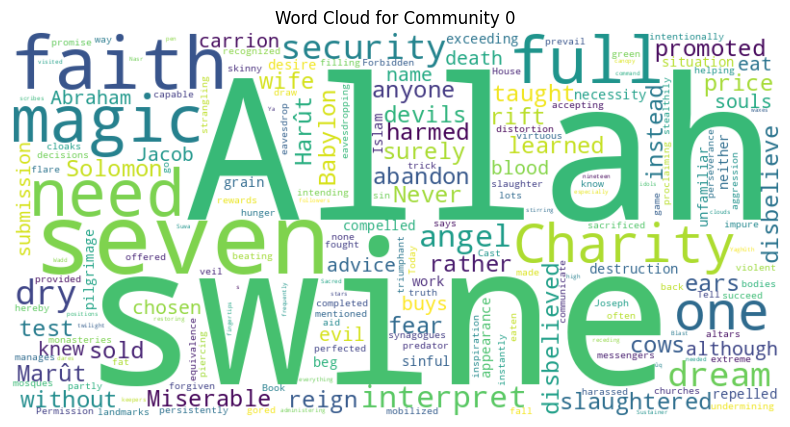

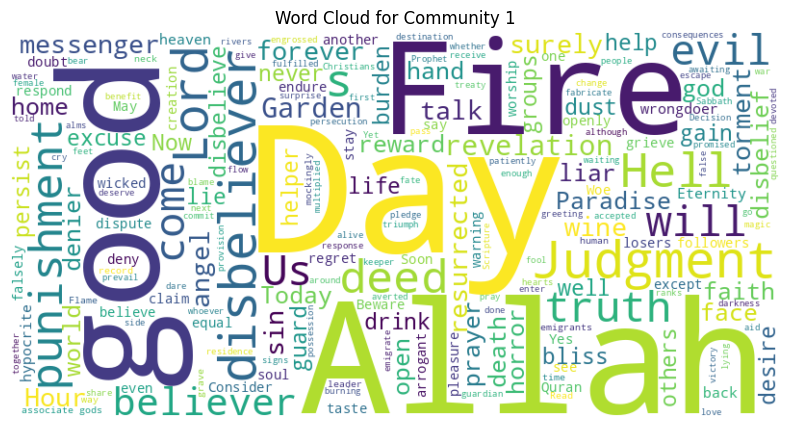

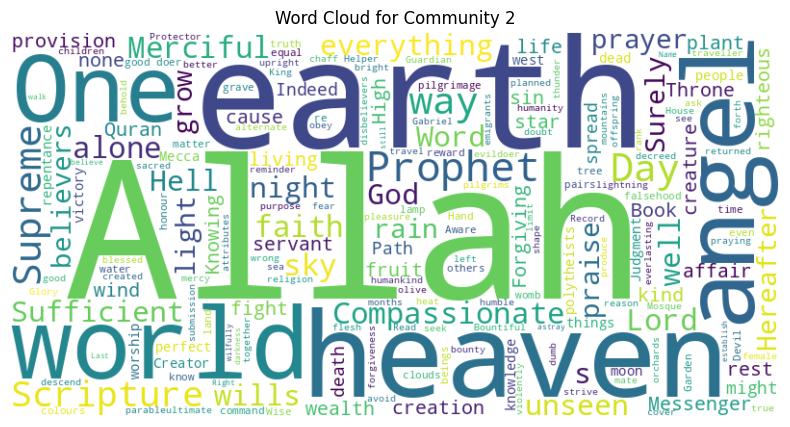

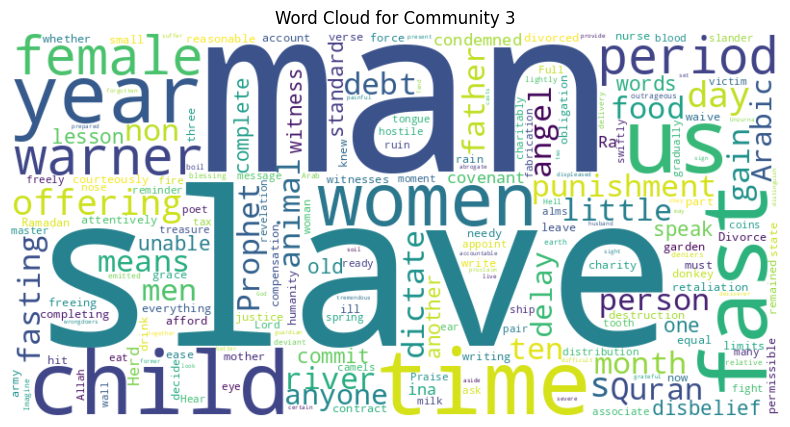

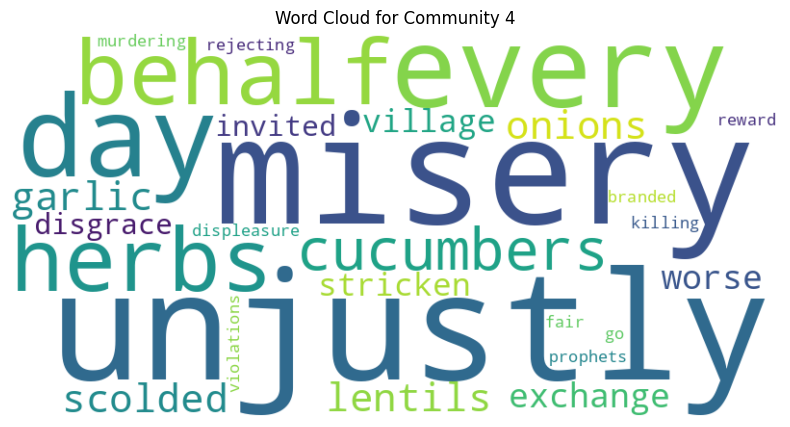

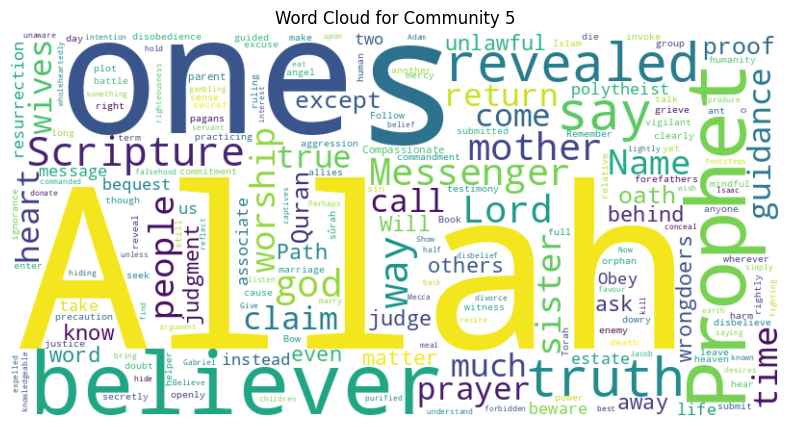

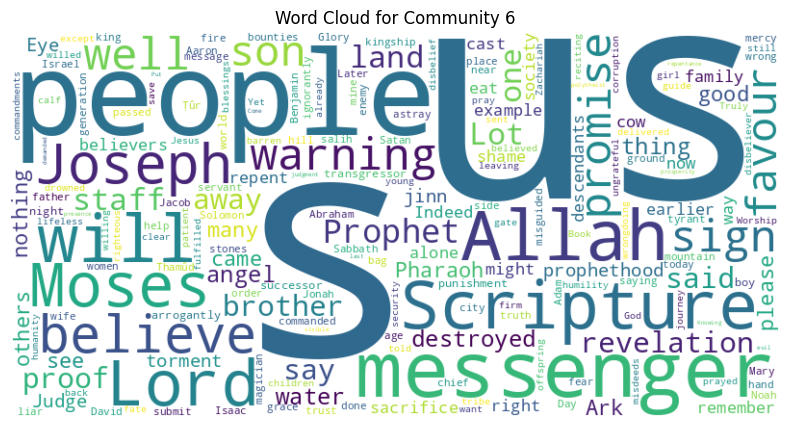

In [16]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Function to generate word cloud for a given community
def generate_wordcloud(words, community_id):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(words))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for Community {community_id}')
    plt.axis('off')
    plt.show()

# Generate word clouds for each community
for community_id in range(num_communities):
    words_in_community = [word for word, community_label in communities.items() if community_label == community_id]
    generate_wordcloud(words_in_community, community_id)


This below code will preprocess the Quranic text, train an LDA model, and print the top words for each topic. You can adjust the number of topics (num_topics) based on your preference.

In [17]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Tokenize Quranic verses and remove stopwords
stopwords = set(nltk.corpus.stopwords.words('english'))

def tokenize_and_remove_stopwords(verse):
    tokens = nltk.word_tokenize(verse)
    return [token.lower() for token in tokens if token.isalnum() and token.lower() not in stopwords]

# Tokenize and preprocess Quranic verses
quran['ayah_en_processed'] = quran['ayah_en'].apply(tokenize_and_remove_stopwords)

# Convert preprocessed verses to text
quran_text = quran['ayah_en_processed'].apply(lambda tokens: ' '.join(tokens))

# Vectorize the text using count vectorizer
vectorizer = CountVectorizer(max_df=0.95, min_df=2, max_features=1000, lowercase=False)
X = vectorizer.fit_transform(quran_text)

# Apply LDA
num_topics = 10  # You can adjust the number of topics as needed
lda = LatentDirichletAllocation(n_components=num_topics, random_state=42)
lda.fit(X)

# Print the top words for each topic
feature_names = vectorizer.get_feature_names_out()
print("Top words for each topic:")
for topic_idx, topic in enumerate(lda.components_):
    top_words_idx = topic.argsort()[:-10 - 1:-1]
    top_words = [feature_names[i] for i in top_words_idx]
    print(f"Topic {topic_idx}: {' '.join(top_words)}")


Top words for each topic:
Topic 0: lord allah surely worship indeed merciful people certainly one gardens
Topic 1: day whoever fire judgment us lord hell disbelievers used evil
Topic 2: allah say prophet believers messenger ask let best true reward
Topic 3: allah would away surely turn hearts believers upon may sign
Topic 4: us night made people lord moses said signs came land
Topic 5: come sent people indeed clear revelations revealed truth book lord
Topic 6: allah see people never would follow land way nothing others
Topic 7: people truly lord one said two allah moses pharaoh fear
Topic 8: allah punishment painful people good torment created many lord suffer
Topic 9: allah earth whatever heavens know everything created lord wills belongs


Each topic represents a thematic cluster of words that frequently co-occur within the Quranic text. These topics provide insights into the different themes and concepts discussed in the Quran.


# Number of Suras

In [18]:
No_Surah=len(quran['surah_no'].unique())
No_Surah

114

# The number of Surahs are Meccan or Medinian!

In [19]:
# Display unique values in the 'place_of_revelation' column
unique_places = quran['place_of_revelation'].unique()
print("Unique Places of Revelation:", unique_places)



Unique Places of Revelation: ['Meccan' 'Medinan']


In [20]:
# Group the data by 'place_of_revelation' and count the number of suras in each group
suras_by_place = quran.groupby('place_of_revelation')['surah_no'].unique()

# Display the surah numbers for each place of revelation
for place, suras in suras_by_place.items():
    print(f"Suras Revealed in {place}: {len(suras)}")
    print(suras)



Suras Revealed in Meccan: 86
[  1   6   7  10  11  12  14  15  16  17  18  19  20  21  23  25  26  27
  28  29  30  31  32  34  35  36  37  38  39  40  41  42  43  44  45  46
  50  51  52  53  54  56  67  68  69  70  71  72  73  74  75  77  78  79
  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97
 100 101 102 103 104 105 106 107 108 109 111 112 113 114]
Suras Revealed in Medinan: 28
[  2   3   4   5   8   9  13  22  24  33  47  48  49  55  57  58  59  60
  61  62  63  64  65  66  76  98  99 110]


In [21]:
quran_text = quran[['surah_no','surah_name_roman','ayah_no_surah','ayah_no_quran','ayah_en']]
quran_text['ayah_en'][0]


'In the Name of Allah—the Most Compassionate, Most Merciful.'

# Word Frequencies in the Quran

In [22]:
from collections import Counter

# Tokenize the Quranic text into words
quran_words = ' '.join(quran['ayah_en']).split()

# Count the occurrences of each word
word_counts = Counter(quran_words)

# Sort the word counts by frequency in descending order
sorted_word_counts = sorted(word_counts.items(), key=lambda x: x[1], reverse=True)

# Display the top 20 most frequent words
print("Top 20 Most Frequent Words in the Quran:")
for word, count in sorted_word_counts[:20]:
    print(f"{word}: {count}")


Top 20 Most Frequent Words in the Quran:
the: 6382
and: 3991
to: 3458
of: 3402
you: 3121
is: 2745
will: 2574
they: 2179
a: 1981
in: 1908
Allah: 1779
for: 1696
And: 1564
be: 1474
their: 1368
not: 1346
We: 1280
who: 1240
have: 1236
them: 1218


In [23]:
quran_text['ayah_en'] = quran_text['ayah_en'].apply(lambda x: ' '.join([word.lower() for word in x.split()]))

/tmp/ipykernel_18/1262506433.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quran_text['ayah_en'] = quran_text['ayah_en'].apply(lambda x: ' '.join([word.lower() for word in x.split()]))


In [24]:
# Assuming 'text_column' is the name of the column containing text data
quran_words = [
    "allah",
    "prophet","prophets","muhammad", "isa","jesus", "moses",
    "quran","believer","faith","prayer",
    "charity","mercy","guidance","revelation","courage",
    "heaven","hell", "angel", "sin","forgiveness","patience",
    "gratitude","peace","justice","knowledge", "wisdom","hope",
    "guide","love","forgive","parents","parent","mother","father",
    "life","death","mankind","light","darkness","pray","kind","worship","ask"
]

    
    
for i in quran_words:
 total_occurrences = quran_text['ayah_en'].str.count(i).sum()
 print(f"The word '{i}' occurs {total_occurrences} times in the Quran.")
    

The word 'allah' occurs 2888 times in the Quran.
The word 'prophet' occurs 635 times in the Quran.
The word 'prophets' occurs 34 times in the Quran.
The word 'muhammad' occurs 8 times in the Quran.
The word 'isa' occurs 39 times in the Quran.
The word 'jesus' occurs 30 times in the Quran.
The word 'moses' occurs 176 times in the Quran.
The word 'quran' occurs 137 times in the Quran.
The word 'believer' occurs 659 times in the Quran.
The word 'faith' occurs 197 times in the Quran.
The word 'prayer' occurs 115 times in the Quran.
The word 'charity' occurs 25 times in the Quran.
The word 'mercy' occurs 151 times in the Quran.
The word 'guidance' occurs 78 times in the Quran.
The word 'revelation' occurs 166 times in the Quran.
The word 'courage' occurs 14 times in the Quran.
The word 'heaven' occurs 256 times in the Quran.
The word 'hell' occurs 128 times in the Quran.
The word 'angel' occurs 145 times in the Quran.
The word 'sin' occurs 278 times in the Quran.
The word 'forgiveness' occu

# Verses Containing 'Peace'

In [25]:
quran_text['peace']=quran_text['ayah_en'].apply(lambda x: 1 if "peace" in x.split() else 0 )
quran_peace=quran_text[quran_text['peace']==1]
quran_peace

/tmp/ipykernel_18/1275200427.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quran_text['peace']=quran_text['ayah_en'].apply(lambda x: 1 if "peace" in x.split() else 0 )


,surah_no,surah_name_roman,ayah_no_surah,ayah_no_quran,ayah_en,peace
230,2,Al-Baqarah,224,231,do not use allah’s name in your oaths as an ex...,1
915,6,Al-An'am,127,916,they will have the home of peace with their lo...,1
1220,8,Al-Anfal,61,1221,"if the enemy is inclined towards peace, make p...",1
1388,10,Yunus,25,1389,and allah invites ˹all˺ to the home of peace a...,1
1520,11,Hud,48,1521,"it was said, “o noah! disembark with our peace...",1
1847,15,Al-Hijr,46,1848,"˹it will be said to them,˺ “enter in peace and...",1
2264,19,Maryam,15,2265,"peace be upon him the day he was born, and the...",1
2282,19,Maryam,33,2283,"peace be upon me the day i was born, the day i...",1
3217,27,An-Naml,59,3218,"say, ˹o prophet,˺ “praise be to allah, and pea...",1
3306,28,Al-Qasas,55,3307,"when they hear slanderous talk, they turn away...",1


# Verses Containing 'Justice'

In [26]:
quran_text['justice']=quran_text['ayah_en'].apply(lambda x: 1 if "justice" in x.split() else 0 )
quran_text[quran_text['justice']==1]

/tmp/ipykernel_18/1936324978.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quran_text['justice']=quran_text['ayah_en'].apply(lambda x: 1 if "justice" in x.split() else 0 )


,surah_no,surah_name_roman,ayah_no_surah,ayah_no_quran,ayah_en,peace,justice
288,2,Al-Baqarah,282,289,o believers! when you contract a loan for a fi...,0,1
621,4,An-Nisa,129,622,you will never be able to maintain ˹emotional˺...,0,1
627,4,An-Nisa,135,628,o believers! stand firm for justice as witness...,0,1
1112,7,Al-A'raf,159,1113,there are some among the people of moses who g...,0,1
1134,7,Al-A'raf,181,1135,and among those we created is a group that gui...,0,1
1976,16,An-Nahl,76,1977,and allah sets forth a parable of two men: one...,0,1
2529,21,Al-Anbya,47,2530,we will set up the scales of justice on the da...,0,1
4310,42,Ash-Shuraa,39,4311,and who enforce justice when wronged.,0,1
4312,42,Ash-Shuraa,41,4313,there is no blame on those who enforce justice...,0,1


# Verses containing 'knowledge'

In [27]:
quran_text['knowledge']=quran_text['ayah_en'].apply(lambda x: 1 if "knowledge" in x.split() else 0 )
knowledge=quran_text[quran_text['knowledge']==1]
knowledge

/tmp/ipykernel_18/3068785844.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quran_text['knowledge']=quran_text['ayah_en'].apply(lambda x: 1 if "knowledge" in x.split() else 0 )


,surah_no,surah_name_roman,ayah_no_surah,ayah_no_quran,ayah_en,peace,justice,knowledge
35,2,Al-Baqarah,29,36,he is the one who created everything in the ea...,0,0,1
38,2,Al-Baqarah,32,39,"they replied, “glory be to you! we have no kno...",0,0,1
82,2,Al-Baqarah,76,83,"when they meet the believers they say, “we bel...",0,0,1
101,2,Al-Baqarah,95,102,but they will never wish for that because of w...,0,0,1
119,2,Al-Baqarah,113,120,"the jews say, “the christians have nothing to ...",0,0,1
...,...,...,...,...,...,...,...,...
5183,62,Al-Jumu'ah,7,5184,but they will never wish for that because of w...,0,0,1
5209,64,At-Taghabun,11,5210,no calamity befalls ˹anyone˺ except by allah’s...,0,0,1
5266,67,Al-Mulk,26,5267,"say, ˹o prophet,˺ “that knowledge is with alla...",0,0,1
5755,79,An-Nazi'at,44,5756,that knowledge rests with your lord ˹alone˺.,0,0,1


# Verses containing 'Life'

In [28]:
quran_text['life']=quran_text['ayah_en'].apply(lambda x: 1 if "life" in x.split() else 0 )
life=quran_text[quran_text['life']==1]
life

/tmp/ipykernel_18/2368561344.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quran_text['life']=quran_text['ayah_en'].apply(lambda x: 1 if "life" in x.split() else 0 )


,surah_no,surah_name_roman,ayah_no_surah,ayah_no_quran,ayah_en,peace,justice,knowledge,life
62,2,Al-Baqarah,56,63,then we brought you back to life after your de...,0,0,0,1
91,2,Al-Baqarah,85,92,"but here you are, killing each other and expel...",0,0,0,1
92,2,Al-Baqarah,86,93,these are the ones who trade the hereafter for...,0,0,0,1
102,2,Al-Baqarah,96,103,you will surely find them clinging to life mor...,0,0,0,1
185,2,Al-Baqarah,179,186,there is ˹security of˺ life for you in ˹the la...,0,0,0,1
...,...,...,...,...,...,...,...,...,...
5749,79,An-Nazi'at,38,5750,"and preferred the ˹fleeting˺ life of this world,",0,0,0,1
5963,87,Al-A'la,16,5964,but you ˹deniers only˺ prefer the life of this...,0,0,0,1
6070,92,Al-Layl,13,6071,and surely to us ˹alone˺ belong this life and ...,0,0,0,1
6082,93,Ad-Duhaa,4,6083,and the next life is certainly far better for ...,0,0,0,1


# Distribution of Verses Across Surahs:
We'll visualize the distribution of verses across surahs using a histogram or bar plot. This will help us understand how the number of verses varies from one surah to another.



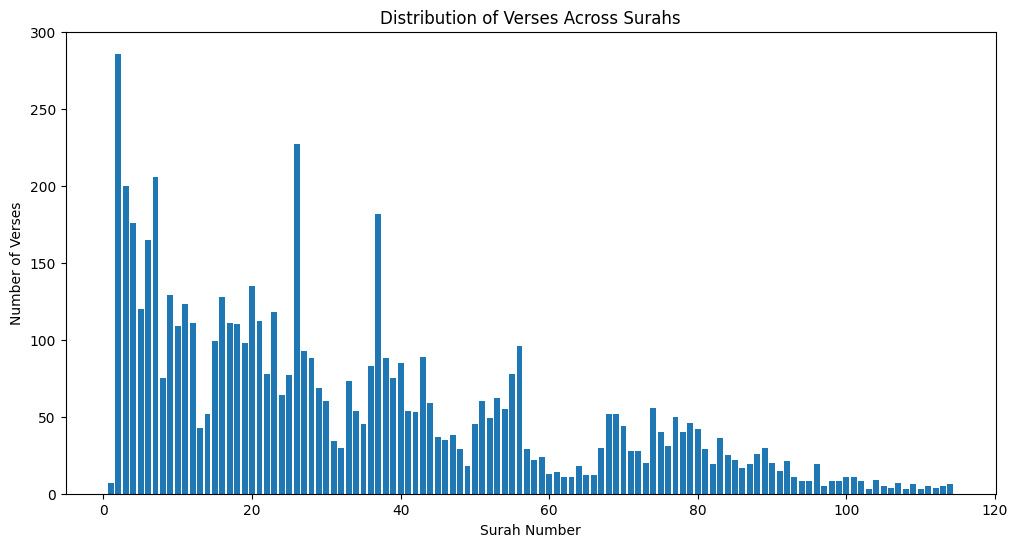

In [29]:
import matplotlib.pyplot as plt

# Distribution of verses across surahs
plt.figure(figsize=(12, 6))
plt.bar(quran['surah_no'], quran['total_ayah_surah'])
plt.xlabel('Surah Number')
plt.ylabel('Number of Verses')
plt.title('Distribution of Verses Across Surahs')
plt.show()




# Correlation Between Verse Length and Position:
We'll calculate the length of each verse (e.g., number of words or characters) and then analyze if there's any correlation between the length of a verse and its position in the Quran (e.g., surah number, verse number within the surah).

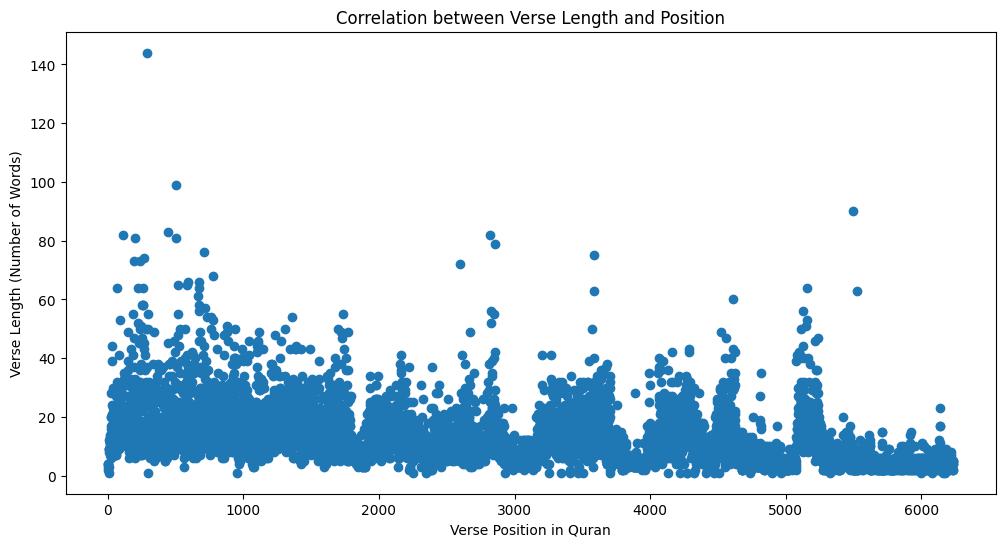

In [30]:
# Correlation between verse length and position
plt.figure(figsize=(12, 6))
plt.scatter(quran['ayah_no_quran'], quran['no_of_word_ayah'])
plt.xlabel('Verse Position in Quran')
plt.ylabel('Verse Length (Number of Words)')
plt.title('Correlation between Verse Length and Position')
plt.show()

# Scientific Versues and words

In [31]:
# List of scientific terms to search for
scientific_terms = ['earth','science', 'moon', 'sun', 'gravity', 'blackhole', 'star', 'mountain', 'sea']

# Function to search for scientific terms in Quranic verses
def search_scientific_terms(verse):
    tokens = nltk.word_tokenize(verse)
    scientific_words = [word.lower() for word in tokens if word.lower() in scientific_terms]
    return scientific_words

# Search for scientific terms in Quranic verses
quran['scientific_terms'] = quran['ayah_en'].apply(search_scientific_terms)

# Display verses containing scientific terms
verses_with_scientific_terms = quran[quran['scientific_terms'].apply(len) > 0]
for index, row in verses_with_scientific_terms.iterrows():
    print(f"Surah {row['surah_no']}, Ayah {row['ayah_no_surah']}: {row['ayah_en']}")
    print(f"Scientific Terms: {', '.join(row['scientific_terms'])}\n")


Surah 2, Ayah 22: ˹He is the One˺ Who has made the earth a place of settlement for you and the sky a canopy; and sends down rain from the sky, causing fruits to grow as a provision for you. So do not knowingly set up equals to Allah ˹in worship˺.
Scientific Terms: earth

Surah 2, Ayah 29: He is the One Who created everything in the earth for you. Then He turned towards the heaven, forming it into seven heavens. And He has ˹perfect˺ knowledge of all things.
Scientific Terms: earth

Surah 2, Ayah 33: Allah said, “O Adam! Inform them of their names.” Then when Adam did, Allah said, “Did I not tell you that I know the secrets of the heavens and the earth, and I know what you reveal and what you conceal?”
Scientific Terms: earth

Surah 2, Ayah 36: But Satan deceived them—leading to their fall from the ˹blissful˺ state they were in, You will find in the earth a residence and provision for your appointed stay.”
Scientific Terms: earth

Surah 2, Ayah 50: And ˹remember˺ when We parted the sea, 

# Prophets names directly mentioned in the Quran

In [32]:
# List of common names of prophets
prophet_names = ['adam', 'noah', 'hud', 'saleh', 'ibrahim', 'ismail', 'ishaq', 'yaqub', 'yusuf', 'shuayb',
                 'moses', 'harun', 'david', 'solomon', 'iliyas', 'al-yasa', 'jonah', 'ayyub', 'dhul-kifl',
                 'zakariya', 'yahya', 'isa', 'muhammad']

# Function to search for prophet names in Quranic verses
def search_prophet_names(verse):
    tokens = nltk.word_tokenize(verse)
    prophet_words = [word.lower() for word in tokens if word.lower() in prophet_names]
    return prophet_words

# Search for prophet names in Quranic verses
quran['prophet_names'] = quran['ayah_en'].apply(search_prophet_names)

# Display verses containing prophet names
verses_with_prophet_names = quran[quran['prophet_names'].apply(len) > 0]
for index, row in verses_with_prophet_names.iterrows():
    print(f"Surah {row['surah_no']}, Ayah {row['ayah_no_surah']}: {row['ayah_en']}")
    print(f"Prophet Names: {', '.join(row['prophet_names'])}\n")


Surah 2, Ayah 31: He taught Adam the names of all things, then He presented them to the angels and said, “Tell Me the names of these, if what you say is true?”
Prophet Names: adam

Surah 2, Ayah 33: Allah said, “O Adam! Inform them of their names.” Then when Adam did, Allah said, “Did I not tell you that I know the secrets of the heavens and the earth, and I know what you reveal and what you conceal?”
Prophet Names: adam, adam

Surah 2, Ayah 34: And ˹remember˺ when We said to the angels, “Prostrate before Adam,” becoming unfaithful.
Prophet Names: adam

Surah 2, Ayah 35: We cautioned, “O Adam! Live with your wife in Paradise and eat as freely as you please, but do not approach this tree, or else you will be wrongdoers.”
Prophet Names: adam

Surah 2, Ayah 37: Then Adam was inspired with words ˹of prayer˺ by his Lord, so He accepted his repentance. Surely He is the Accepter of Repentance, Most Merciful.
Prophet Names: adam

Surah 2, Ayah 51: And ˹remember˺ when We appointed forty nights 

# The prophet who's name is highest mentioned

In [33]:
from collections import Counter

# Count occurrences of each prophet's name in the Quranic text
prophet_names_counts = Counter(quran['prophet_names'].explode())

# Find the prophet name mentioned the highest number of times
most_mentioned_prophet = prophet_names_counts.most_common(1)[0]

# Display the most mentioned prophet
print("Prophet Mentioned Most Frequently in the Quran:")
print(f"{most_mentioned_prophet[0].capitalize()}: {most_mentioned_prophet[1]} mentions")



Prophet Mentioned Most Frequently in the Quran:
Moses: 172 mentions


# Motivational Verses in the Quran

In [34]:
# List of keywords related to motivation
motivational_keywords = ['hope', 'patience', 'perseverance', 'strength', 'faith', 'determination', 'optimism', 'success', 'reward']

# Function to search for motivational keywords in Quranic verses
def search_motivational_keywords(verse):
    tokens = nltk.word_tokenize(verse)
    motivational_words = [word.lower() for word in tokens if word.lower() in motivational_keywords]
    return motivational_words

# Search for motivational keywords in Quranic verses
quran['motivational_keywords'] = quran['ayah_en'].apply(search_motivational_keywords)

# Display verses containing motivational keywords
verses_with_motivational_keywords = quran[quran['motivational_keywords'].apply(len) > 0]
for index, row in verses_with_motivational_keywords.iterrows():
    print(f"Surah {row['surah_no']}, Ayah {row['ayah_no_surah']}: {row['ayah_en']}")
    print(f"Motivational Keywords: {', '.join(row['motivational_keywords'])}\n")


Surah 2, Ayah 4: and who believe in what has been revealed to you ˹O Prophet˺ and what was revealed before you, and have sure faith in the Hereafter.
Motivational Keywords: faith

Surah 2, Ayah 45: And seek help through patience and prayer. Indeed, it is a burden except for the humble—
Motivational Keywords: patience

Surah 2, Ayah 58: And ˹remember˺ when We said, “Enter this city and eat freely from wherever you please; enter the gate with humility, saying, ‘Absolve us.’ We will forgive your sins and multiply the reward for the good-doers.”
Motivational Keywords: reward

Surah 2, Ayah 85: But here you are, killing each other and expelling some of your people from their homes, aiding one another in sin and aggression; and when those ˹expelled˺ come to you as captives, you still ransom them—though expelling them was unlawful for you. Do you believe in some of the Scripture and reject the rest? Is there any reward for those who do so among you other than disgrace in this worldly life and

# Quest for knowledge mentioned or indicated in the Quran

In [35]:
# List of keywords related to knowledge
scientific_keywords = ['knowledge']

# Function to search for scientific keywords in Quranic verses
def search_scientific_keywords(verse):
    tokens = nltk.word_tokenize(verse)
    scientific_words = [word.lower() for word in tokens if word.lower() in scientific_keywords]
    return scientific_words

# Search for scientific keywords in Quranic verses
quran['scientific_keywords'] = quran['ayah_en'].apply(search_scientific_keywords)

# Display verses containing scientific keywords
verses_with_scientific_keywords = quran[quran['scientific_keywords'].apply(len) > 0]
for index, row in verses_with_scientific_keywords.iterrows():
    print(f"Surah {row['surah_no']}, Ayah {row['ayah_no_surah']}: {row['ayah_en']}")
    print(f"Scientific Keywords: {', '.join(row['scientific_keywords'])}\n")


Surah 2, Ayah 29: He is the One Who created everything in the earth for you. Then He turned towards the heaven, forming it into seven heavens. And He has ˹perfect˺ knowledge of all things.
Scientific Keywords: knowledge

Surah 2, Ayah 32: They replied, “Glory be to You! We have no knowledge except what You have taught us. You are truly the All-Knowing, All-Wise.”
Scientific Keywords: knowledge

Surah 2, Ayah 76: When they meet the believers they say, “We believe.” But in private they say ˹to each other˺, “Will you disclose to the believers the knowledge Allah has revealed to you, so that they may use it against you before your Lord? Do you not understand?”
Scientific Keywords: knowledge

Surah 2, Ayah 95: But they will never wish for that because of what their hands have done. And Allah has ˹perfect˺ knowledge of the wrongdoers.
Scientific Keywords: knowledge

Surah 2, Ayah 113: The Jews say, “The Christians have nothing to stand on” and the Christians say, “The Jews have nothing to st

# Language Complexity Analysis of the Quranic verses

In [36]:
import numpy as np

# Calculate average word length
quran['word_lengths'] = quran['ayah_en'].apply(lambda x: np.mean([len(word) for word in x.split()]))

# Calculate vocabulary richness
quran['unique_words'] = quran['ayah_en'].apply(lambda x: len(set(x.split())))

# Calculate average sentence length
quran['sentence_lengths'] = quran['ayah_en'].apply(lambda x: len(x.split()))

# Display the results
average_word_length = quran['word_lengths'].mean()
vocabulary_richness = quran['unique_words'].mean()
average_sentence_length = quran['sentence_lengths'].mean()

print("Language Complexity Analysis:")
print(f"Average Word Length: {average_word_length:.2f}")
print(f"Vocabulary Richness: {vocabulary_richness:.2f}")
print(f"Average Sentence Length: {average_sentence_length:.2f}")


Language Complexity Analysis:
Average Word Length: 4.63
Vocabulary Richness: 21.11
Average Sentence Length: 23.87


These metrics provide insights into the complexity of language used in the Quranic text. A higher average word length suggests longer and potentially more complex words, while a higher vocabulary richness indicates a wider variety of words used. Additionally, the average sentence length provides an understanding of the typical length of sentences in the text.

# Geospatial Analysis: for the places of the revelation of Quranic verses

In [37]:
import folium

# Geographical coordinates for Mecca and Medina
mecca_coordinates = (21.4225, 39.8262)
medina_coordinates = (24.4709, 39.6122)

# Create a map centered at Mecca
mymap = folium.Map(location=mecca_coordinates, zoom_start=6)

# Add markers for Mecca and Medina
folium.Marker(location=mecca_coordinates, popup='Mecca').add_to(mymap)
folium.Marker(location=medina_coordinates, popup='Medina').add_to(mymap)

# Save the map to an HTML file
mymap.save("mecca_medina_map.html")

# Display the map
mymap


# Time Series Analysis: the distribution of verse numbers within surahs

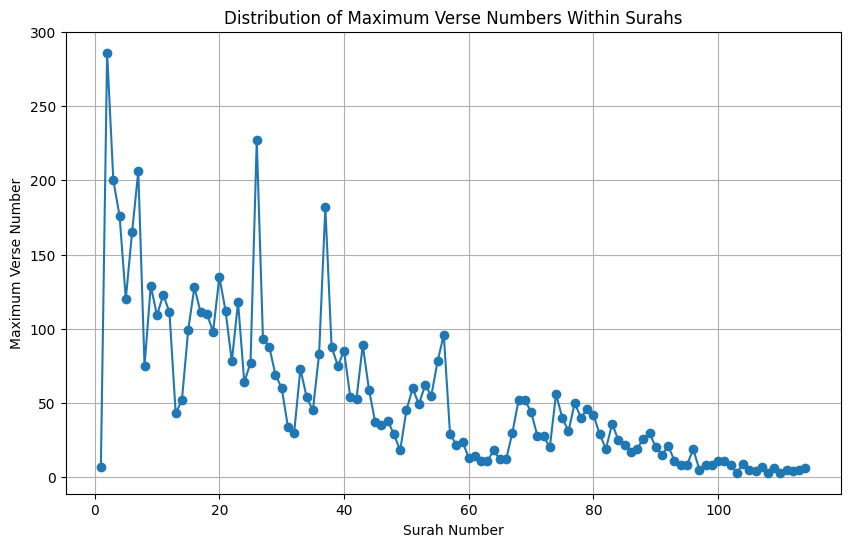

In [38]:
import matplotlib.pyplot as plt

# Group verses by surah and calculate the maximum verse number in each surah
max_verse_by_surah = quran.groupby('surah_no')['ayah_no_surah'].max()

# Plot the distribution of maximum verse numbers within surahs
plt.figure(figsize=(10, 6))
plt.plot(max_verse_by_surah.index, max_verse_by_surah.values, marker='o', linestyle='-')
plt.title('Distribution of Maximum Verse Numbers Within Surahs')
plt.xlabel('Surah Number')
plt.ylabel('Maximum Verse Number')
plt.grid(True)
plt.show()


# Machine Learning Model to detect the place of revelation of the verses of the Quran

In [39]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Sample dataset containing Quranic verses and their corresponding revelation places (replace with your actual dataset)
quran_verses = quran['ayah_en'].tolist()
revelation_places = quran['place_of_revelation'].tolist()

# Convert verses to lowercase
quran_verses = [verse.lower() for verse in quran_verses]

# Vectorize verses using word frequencies
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(quran_verses)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, revelation_places, test_size=0.2, random_state=42)

# Train a Random Forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Predict revelation places for test data
y_pred = clf.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.8373397435897436


The model achieved an accuracy of approximately 83.73% on the test data. This indicates that the Random Forest classifier was able to classify Quranic verses into their respective revelation places (Meccan or Medinan) with a relatively high accuracy.

In [40]:
# Sample Quranic verse for prediction
#Surah Al Anam Verse 75 in Mecca
sample_verse = "We also showed Abraham the wonders of the heavens and the earth, so he would be sure in faith."

# Vectorize the sample verse using the same vectorizer used for training
sample_verse_vectorized = vectorizer.transform([sample_verse])

# Predict the revelation place for the sample verse
predicted_place = clf.predict(sample_verse_vectorized)

print("Predicted Place of Revelation:", predicted_place[0])


Predicted Place of Revelation: Meccan


In [41]:
# Sample Quranic verse for prediction
# Surah al bakarah verse 7 Reveled in Madina
sample_verse = "Allah has sealed their hearts and their hearing, and their sight is covered. They will suffer a tremendous punishment."
# Vectorize the sample verse using the same vectorizer used for training
sample_verse_vectorized = vectorizer.transform([sample_verse])

# Predict the revelation place for the sample verse
predicted_place = clf.predict(sample_verse_vectorized)

print("Predicted Place of Revelation:", predicted_place[0])

Predicted Place of Revelation: Medinan


# Results and Insights:
Through the application of these analysis techniques, the Quranic Analysis Project aims to provide valuable insights into various aspects of the Quranic text. These insights can deepen our understanding of the Quran's content, structure, and linguistic features, as well as shed light on its historical and cultural significance.



# Conclusion:

The Holy Quranic Analysis Project serves as a platform for exploring the rich and profound text of the Quran through the lens of data analysis and natural language processing. By leveraging computational tools and methodologies, the project seeks to uncover hidden patterns, themes, and insights within the Quranic text, contributing to a deeper appreciation and understanding of this timeless scripture.